Current file: D1_M2_IC1.dat
logAction=  52.11527925663228
logAction=  52.41630908577291
logAction=  52.71733916469857
logAction=  53.01836924362423
logAction=  53.319399031134004
logAction=  53.6204291308751
logAction=  53.921459126539084
logAction=  54.222489122203065
logAction=  54.523519117867046
logAction=  54.82454911353102
logAction=  55.12557917424319
logAction=  55.426609169907174
logAction=  55.72763908426093
logAction=  56.028669242545355
logAction=  56.32969903493376
logAction=  56.63072903059774
logAction=  56.93175907708063
logAction=  57.23278907274461
logAction=  57.53381906840859
logAction=  57.83484906407257
logAction=  58.13587905973655
logAction=  58.436909055400534
logAction=  58.737939051064515
logAction=  59.03896888791941
logAction=  59.33999908209474
logAction=  59.64102907775872
logAction=  59.942059023794876
logAction=  60.24308892020318
logAction=  60.544119039936746
logAction=  60.84514903560073
C=  [5.194697 5.194697 5.194697 5.194697 5.194697 5.194697 5.19

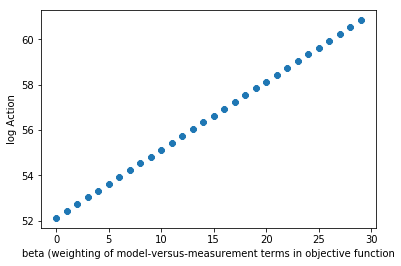

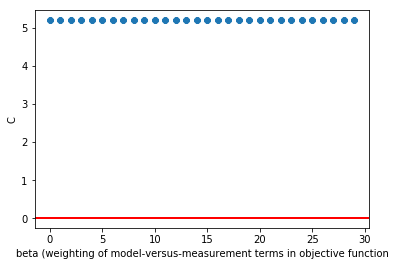

Current file: D1_M2_IC2.dat
logAction=  52.21921582189807
logAction=  52.52024581756205
logAction=  52.821275878766336
logAction=  53.12230600551091
logAction=  53.423335837324146
logAction=  53.72436583298813
logAction=  54.025395992502844
logAction=  54.3264257833534
logAction=  54.62745577901738
logAction=  54.92848582588473
logAction=  55.22951571914197
logAction=  55.53054584281437
logAction=  55.83157577447415
logAction=  56.13260577013812
logAction=  56.4336357658021
logAction=  56.73466576146609
logAction=  57.03569583713533
logAction=  57.33672583279931
logAction=  57.63775582846329
logAction=  57.938785774123986
logAction=  58.239815819791254
logAction=  58.54084581545523
logAction=  58.84187574861511
logAction=  59.1429057442791
logAction=  59.44393573994308
logAction=  59.74496573560706
logAction=  60.04599580940117
logAction=  60.34702580506515
logAction=  60.64805570306646
logAction=  60.94908574756178
C=  [5.833557 5.833557 5.833557 5.833557 5.833557 5.833557 5.833557 5.

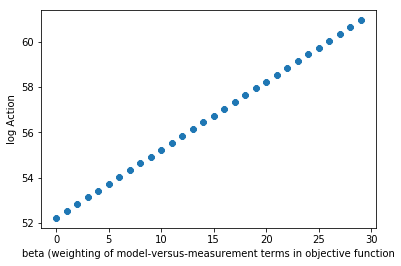

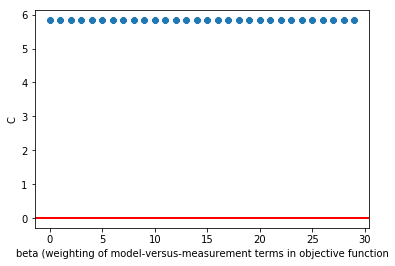

Current file: D1_M2_IC3.dat
logAction=  49.57860551932684
logAction=  49.87963551499082
logAction=  50.18066539605632
logAction=  50.481695534968395
logAction=  50.782725530632376
logAction=  51.08375552629636
logAction=  51.38478552196033
logAction=  51.68581551762432
logAction=  51.9868455132883
logAction=  52.287875598482316
logAction=  52.58890548223375
logAction=  52.88993547789773
logAction=  53.19096558547426
logAction=  53.49199544124755
logAction=  53.793025506856885
logAction=  54.09405550252087
logAction=  54.39508549818485
logAction=  54.69611549384883
logAction=  54.99714544579697
logAction=  55.29817535402925
logAction=  55.59920545898286
logAction=  55.900235454646825
logAction=  56.20126545031081
logAction=  56.50229544597479
logAction=  56.80332544163877
logAction=  57.10435530069073
logAction=  57.40538546711974
logAction=  57.706415377401214
logAction=  58.00744520230013
logAction=  58.30847541142044
C=  [-0.3263409 -0.3263409 -0.3263409 -0.3263409 -0.3263409 -0.3263

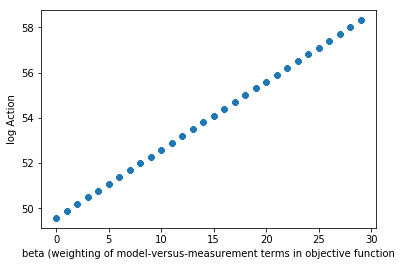

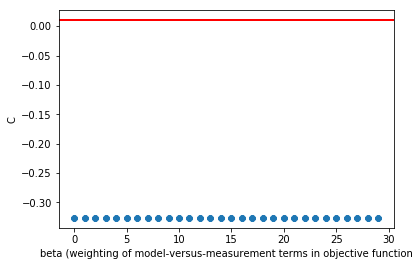

min logA: 58.30847541142044    Path number: 3


In [4]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import os

%matplotlib inline

#####################################################################
### This program:
### 1. Plots logAction(beta) along each path, where you must list all path files in directory PATHs/, and have them again in the 
###    directory in which you run this program;
### 2. Identifies path with lowest value of logA at final beta.

### Careful: This all could get a bit screwed up if the paths are not of equal length beta.

### USER MANUALLY ENTERS THE FOLLOWING. ###
path = 'PATHs/'
D = 1   # number of variables
P = 1 # number of parameters; (to subtract at end of each row)
start = 3  # number of cols to subtract at beginning; for IPOPT this is always 3.
#####################################################################

list_logA = []

listing = os.listdir(path)
outfile = open('ParamEsts_AllPaths.txt', 'w')

for infile in listing:
    results = np.loadtxt(infile)
    
    '''If the dat file only has one line, double the number of lines:'''
#    results = np.vstack((results,results))
    
    print("Current file: " + infile)

    B = len(results)-1   

    beta = results[:,0]
    Action = results[:,2]
    logA = np.zeros(len(Action))
    
    for i in range (0,len(Action)):
        logA[i] = np.log(Action[i])/np.log(10)
#        print>>outfile, 'logAction= ', str(logA[i]) 

#    print logA[B], 'log Action at final beta'    
    list_logA.append(logA[B])
    list_logAstr = str(list_logA)

    all_logA = []    
    for i in range (0,len(Action)):
        logA[i] = np.log(Action[i])/np.log(10)
        print('logAction= ', str(logA[i])) 
        all_logA.append(logA[i])
    np.savetxt('logAction_v_beta_IC%s.txt' % infile, all_logA)
    
#    print list_logA
    
    fig1 = plt.figure(1)
#    plt.ylim((-8.3,-6.5))
    #    plt.ylim((-4.55,-4.21))
#    plt.ylim((-4.16,-4.134))
#    plt.ylim((-3.16,-2.95))
#    plt.ylim((-3.2,-2.4))
#    plt.ylim((-4.17,-3.7))
    plt.plot(beta,logA,'8')
    plt.ylabel('log Action')
    plt.xlabel('beta (weighting of model-versus-measurement terms in objective function')

    ### PARAMETERS ###

    betaRange = np.arange(0,len(results),1)

    C = results[:,-1]
    Cstr = str(C)

    print('C= ', results[:,-1])
    fig2 = plt.figure(2)
    plt.subplot(111)
    plt.plot(betaRange,C,'8')
    plt.ylabel('C')
    plt.axhline(y=0.01, linewidth=2, color = 'r')
    plt.xlabel('beta (weighting of model-versus-measurement terms in objective function')

    plt.show()
    fig1.savefig("Action_%s.png" % infile)    
    fig2.savefig("Params_%s.png" % infile)

min_logA = min(list_logA)

print("min logA:", min_logA, "   Path number:", list_logA.index(min(list_logA)) + 1) 
outfile.close()

In [11]:
logA = np.loadtxt('logAction_v_beta_ICD7_M5_IC10.dat.txt')
print(type(logA))
logA = logA + 3.
beta = np.arange(len(logA))
plt.scatter(beta,logA,c='b')
plt.ylim((-0.1,0.1))
plt.show()

OSError: logAction_v_beta_ICD7_M5_IC10.dat.txt not found.